<a href="https://colab.research.google.com/github/RahulJuluru2/unit2assignments/blob/main/U2W9_09_Tsne_A_RJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint



## Learning Objective

At the end of the experiment, you will be able to:

*   visualize the high-dimensional data (3D) to low-dimensional data (2D) by applying t-SNE algorithm 
*   understand how the introduction of noise into data effects representation of data





In [1]:
#@title Experiment Walkthrough Video
from IPython.display import HTML

HTML("""<video width="854" height="480" controls>
  <source src="https://cdn.talentsprint.com/aiml/AIML_BATCH_HYD_7/Feb10/t_sne_new.mp4" type="video/mp4">
</video>
""")

## Dataset 

### Description

The dataset choosen for this experiment is a swissroll.

## Domain Information

Swiss Roll is a curled surface, where the distance between the points along the surface of the roll and direct distance is different.

If we just project a 2D plane onto a 3D space it would simply squash the various layers together and lose all the information like, geometry and similarity between points we wanted to capture. Instead, what we want is to unroll the Swiss roll, to obtain a 2D data set,  without much loss of information. This approach is Manifold Learning.


Manifold Learning is when we bend and twist a high-dimensional space such that it can be mapped to a lower-dimensional space. It ensures that the optimal manifold is found by reducing the dimensionality of our data set.



## AIML Technique


In this experiment, swiss roll data is a high-dimensional dataset which is difficult to visualize. To aid visualization of the structure of the dataset, the dimension must be reduced in some way. One of the approaches to manifold learning is, **t-SNE**  which is a tool to visualize high-dimensional data by projecting it to low-dimensional data by converting similarities between data points to joint probabilities. These probabilities in the embedded space are represented by Student’s t-distributions. 

Generally,  t-SNE minimizes the divergence between two distributions: a distribution that measures pairwise similarities of the input objects in the higher dimension and the distribution that measures pairwise similarities of the corresponding low-dimensional points in the embedding.

 t-SNE maps the high-dimensional data to a low-dimensional space and attempts to find patterns in the data by identifying  clusters based on the similarity of data points.

## Setup Steps

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2216842" #@param {type:"string"}

In [2]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "9959488784" #@param {type:"string"}

In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython
import warnings
warnings.filterwarnings('ignore')

ipython = get_ipython()
  
notebook= "U2W9_09_Tsne_A" #name of the notebook

def setup(): 
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getWalkthrough() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook, "feedback_walkthrough":Walkthrough ,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
def getWalkthrough():
  try:
    if not Walkthrough:
      raise NameError
    else:
      return Walkthrough
  except NameError:
    print ("Please answer Walkthrough Question")
    return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


## Importing required packages

In [4]:
from sklearn.datasets import *
# Manifold is imported to access swiss roll dataset and the dimensionality reduction approach: t-SNE
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## Generate the swiss roll data

Note: Refer to [make_swiss_roll](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_swiss_roll.html) from sklearn package

In [5]:
# Specify the number of data samples to be generated from swiss roll data
n_samples = 1500

'''we use make_swiss_roll method which takes the number of data samples and 
returns the 3D coordinates of those data samples with the colors projected onto each sample
input is 1500 samples and output will be 1500 X 3'''

X, color = make_swiss_roll(n_samples)

In [6]:
# Print the shape of 'X' and 'color'
X.shape, color.shape

((1500, 3), (1500,))

As you can see above, each of the points in 'X' is labeled with a color label in 'color' variable. 

**Note:** Here we are not using the label for classification purpose, but only for plotting swiss roll with different points which represents different set of colors

## TSNE

By using TSNE reduce the dimensions of data from higher to lower

**Note:** Refer [TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) from sklearn

In [7]:
'''we use TSNE technique from manifold which takes as input 
  the dimensions of the embedded space that the swiss roll data has to be transformed to'''

# Create an object for TSNE class
# Fit and transform the data to TSNE by calculating the joint probabilities between the data points

tsne_data = TSNE(n_components=2).fit_transform(X)

Let us visualize the Swiss roll data 

*   First plot, Visualize the data in 3D
*   Second plot, Visualize after reducing it to 2D by applying TSNE



In [34]:
from mpl_toolkits.mplot3d import Axes3D

def visualizeSwissRoll(tsne_data, X, color):
  fig = plt.figure(figsize=(20,18))
  ax = fig.add_subplot(2,1,1,projection = "3d")
  ax.set_title("here is the swiss roll manifold in 3D",fontsize=20)
  ax.scatter(X[:,0], X[:,1], X[:,2],c=color,cmap="magma",s=50)
  
  ax = fig.add_subplot(2,1,2)
  ax.set_title("With TSNE",fontsize=20)
  ax.scatter(tsne_data[:,0],tsne_data[:,1],cmap="Blues",s=90)

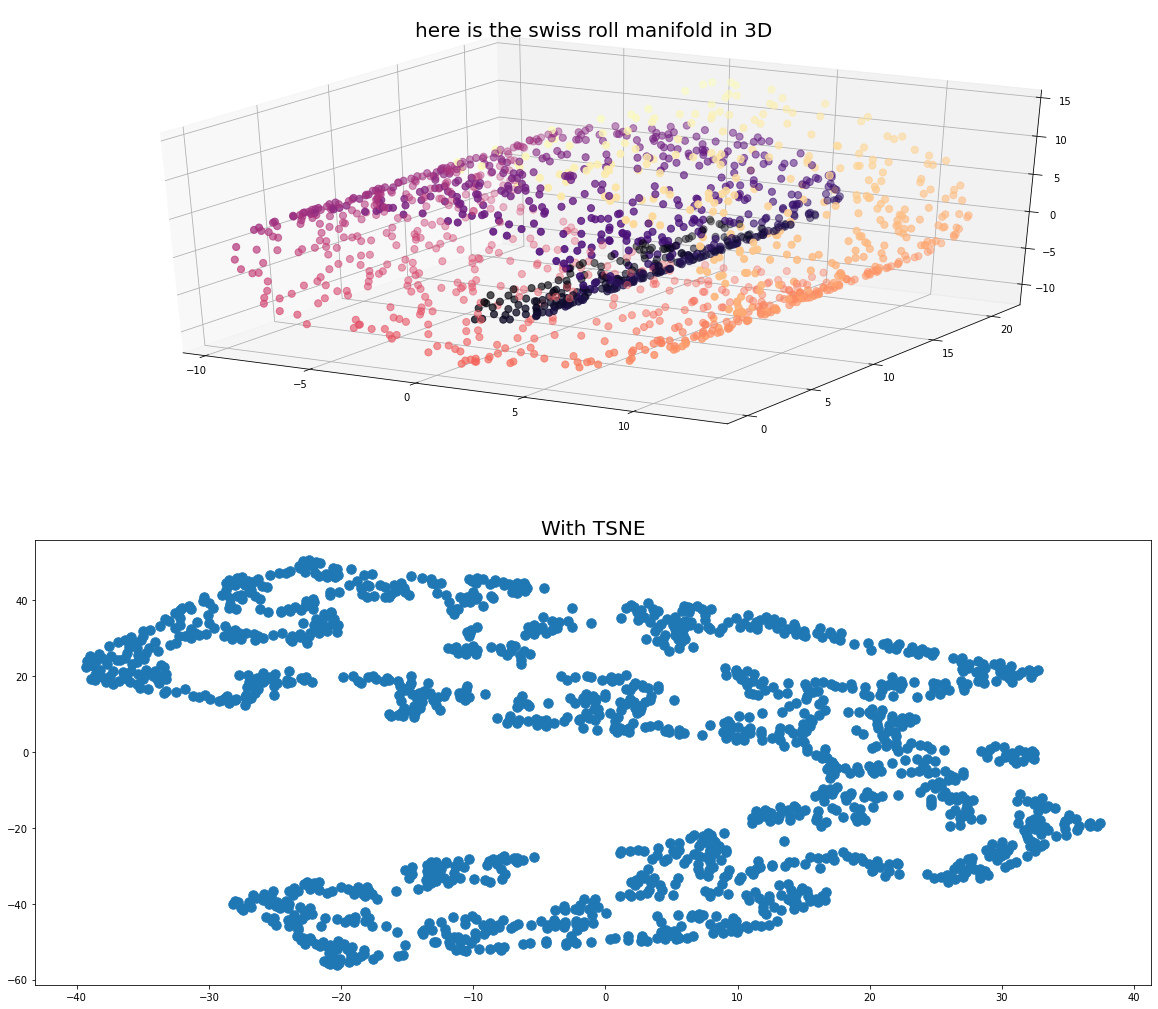

In [35]:
# Call the function to visualize the swissroll 
visualizeSwissRoll(tsne_data, X, color)

Let us generate swiss roll data for 300 samples with some noise in it

In [36]:
''' make_swiss_roll allows you to pass a range of noisy samples along with n_samples 
where the range of noise affects the variance around data samples'''

# Generating the swiss roll data by adding noise
ndata, colors = make_swiss_roll(n_samples= 300, noise=0.01 * 200)

Let us concatenate the noise data values and original data values

In [37]:
con_data =  np.concatenate((X, ndata), axis = 0) # X is orginal data and ndata is noise data
con_colors = np.concatenate((color, colors), axis = 0) # color is orginal and colors are noise 

In [38]:
# Print the shape of 'con_data' and 'con_colors' 
con_data.shape, con_colors.shape

((1800, 3), (1800,))

In [39]:
'''con_data has 300 additional samples that have been generated by make_swiss_roll with noise'''

# Create an object of TSNE class
# Fit and transform the concatenated noisy data to TSNE by calculating the joint probabilites between the data points

tsne_con_data = TSNE(n_components=2).fit_transform(con_data)

Let us visualize the Swiss roll data 

*   First plot, Visualize the data in 3D with noise
*   Second plot, Visualize after reducing it to 2D by applying TSNE


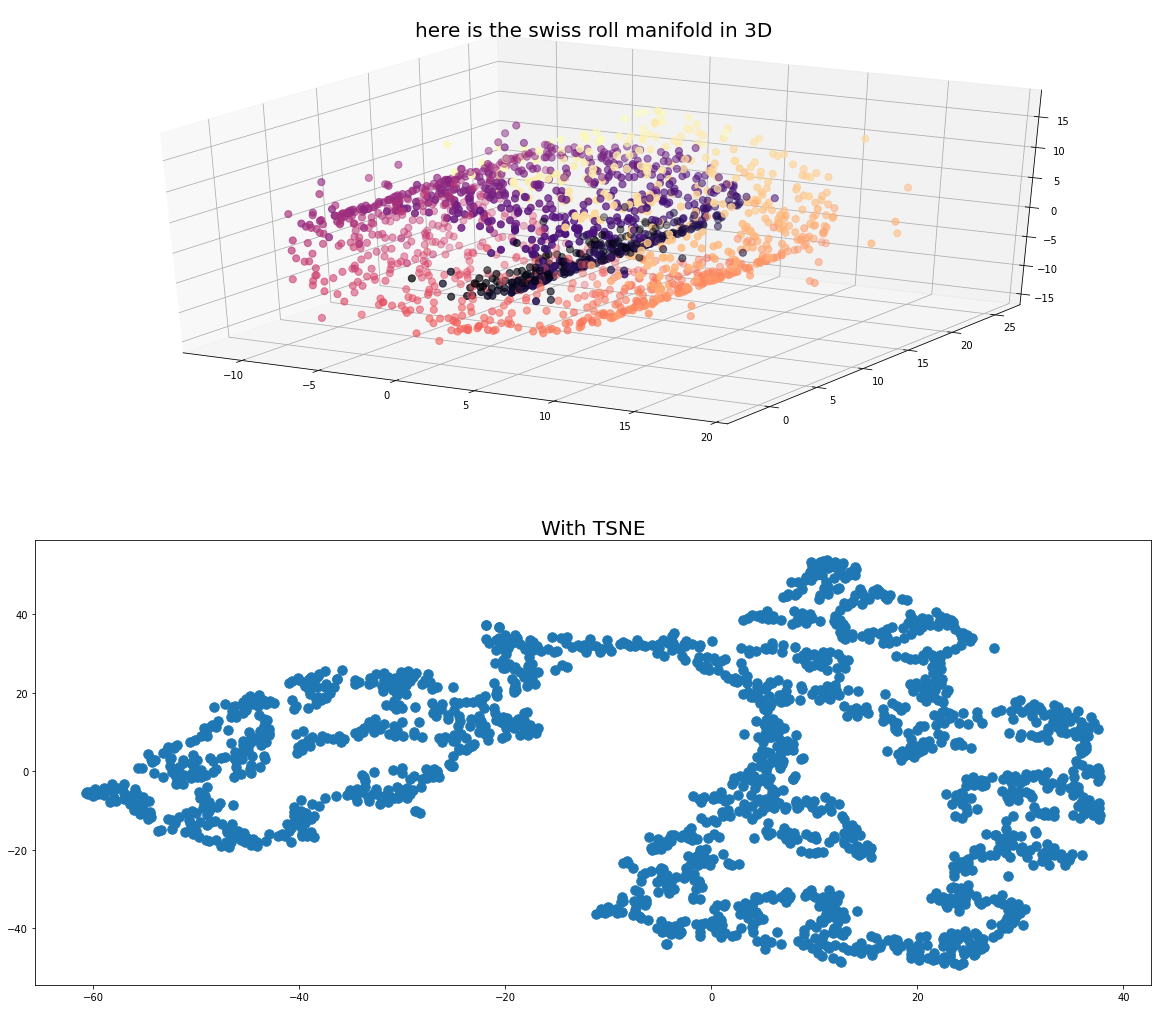

In [42]:
# YOUR CODE HERE: To call the function 'visualizeSwissRoll' by passing concatenated noisy data to visualize the swissroll 
visualizeSwissRoll(tsne_con_data, con_data, con_colors)

You are encouraged to compare this with ISOMAP Experiment (after executing it) and check if TSNE is better resistant to noise when compared with ISOMAP.

## Summary

t-SNE to be particularly sensitive to local structure, revealing data that lie in multiple, different, manifolds or clusters and reduces the tendency to crowd points together at the center.  Notice that it is very robust to noise and other distortions, and hence is widely used for visualization purposes.

# Please answer the questions below to complete the experiment:




In [43]:
#@title A difference between ISOMAP and t-SNE is that t-SNE converts similarities between data-points to probabilities  { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "True" #@param ["","True", "False"]


In [44]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [45]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "Everything is good" #@param {type:"string"}


In [46]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [47]:
#@title  Experiment walkthrough video? { run: "auto", vertical-output: true, display-mode: "form" }
Walkthrough = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [48]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [49]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [50]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 1417
Date of submission:  10 Jul 2022
Time of submission:  15:29:53
View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions
